In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from propertiesdatabase import PropertyDatabase
from propertyinvestment import PropertyInvestment

In [11]:
db = PropertyDatabase('propertiesDB_V1.db')
df = db.get_propertiesDF()
investment = PropertyInvestment(df)
df = investment.getProperties()
# Assuming you have a DataFrame 'df' already loaded with data
print(df[['type', 'address','city', 'size', 'price','rent', 'ROI']].head())

   type              address       city  size       price      rent        ROI
0  shop        The Centaurus  Islamabad   0.4  10000000.0  100000.0  12.000000
1  shop        The Centaurus  Islamabad   0.9  40000000.0  200000.0   6.000000
2  shop  DHA Defence Phase 2  Islamabad   0.8   7020000.0   96000.0  16.410256
3  shop  DHA Defence Phase 2  Islamabad   0.4   3900000.0   39000.0  12.000000
4  shop       Bahria Enclave  Islamabad   0.9   8000000.0  100000.0  15.000000


## Most Common ROI

The most common ROI is: 12.0


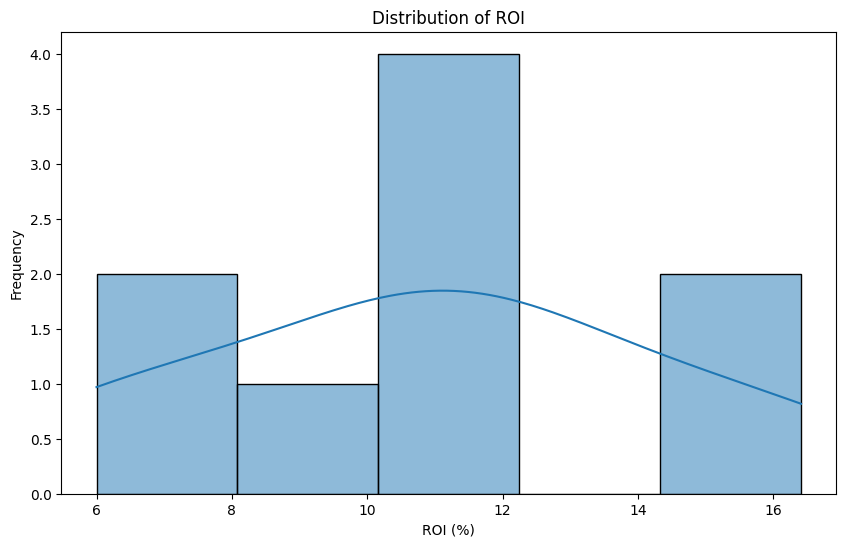

In [15]:
most_common_roi = df['ROI'].mode()[0]
print("The most common ROI is:", most_common_roi)
plt.figure(figsize=(10, 6))
sns.histplot(df['ROI'], kde=True)
plt.title('Distribution of ROI')
plt.xlabel('ROI (%)')
plt.ylabel('Frequency')
plt.show()

## Isalmabad offers much better properties in terms of ROI

City with the best average ROI: Islamabad
Average ROI: 12.28%


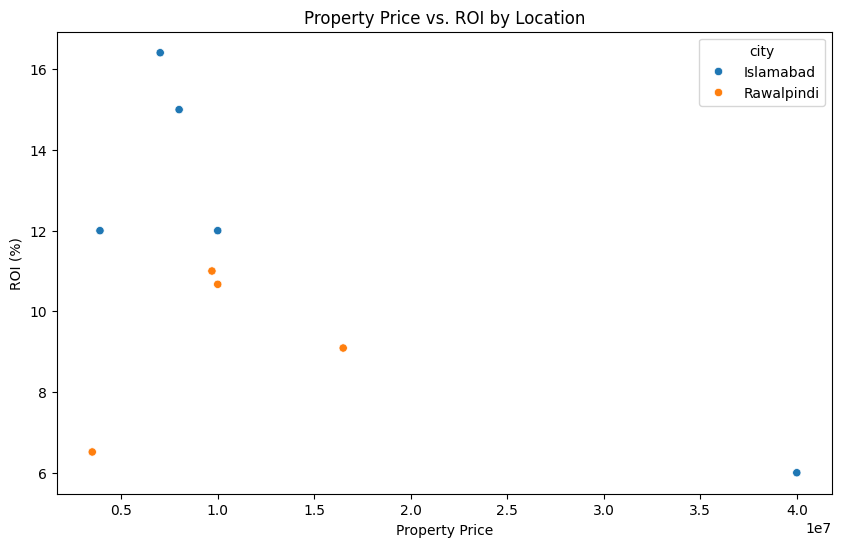

In [17]:
average_roi_by_city = df.groupby('city')['ROI'].mean()
best_city = average_roi_by_city.idxmax()
best_roi = average_roi_by_city.max()
print(f"City with the best average ROI: {best_city}")
print(f"Average ROI: {best_roi:.2f}%")

# Scatter plot of Price vs. ROI
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='ROI', data=df, hue='city')
plt.title('Property Price vs. ROI by Location')
plt.xlabel('Property Price')
plt.ylabel('ROI (%)')
plt.show()

In [7]:
# Parameterization of the strategy
investment_horizon = 10 # years
monthly_savings = 100000*5 # in currency

investment.execute_strategy("high_roi", monthly_savings, investment_horizon)
print(investment.bought_properties)
print("--------------------------------------------------------------------------")
print(f"Total Duration (Years): {investment_horizon}")
print(f"Monthly Input: {monthly_savings}")
print(f"Total Properties Bought: {len(investment.bought_properties)}")
print(f"Total Investment: PKR {investment.bought_properties['Price'].sum():,.2f}")
print(f"Total Rental Income: PKR {investment.bought_properties['Rent'].sum():,.2f}")
print(f"Average ROI: {investment.bought_properties['ROI'].mean():.2f}%")

print("--------------------------------------------------------------------------")

top_roi_properties = investment.bought_properties.nlargest(5, 'ROI')
print("Top 5 Properties by ROI:")
print(top_roi_properties[['City', 'Price', 'ROI']])

     Type  Size       Price      Rent        ROI Bought Month        City
0  office   0.8   3500000.0   19000.0   6.514286           35  Rawalpindi
1    shop   0.4   3900000.0   39000.0  12.000000           68   Islamabad
2    shop   0.8   7020000.0   96000.0  16.410256          113   Islamabad
3    shop   0.9   8000000.0  100000.0  15.000000           13   Islamabad
4    shop   0.4  10000000.0  100000.0  12.000000           26   Islamabad
5    shop   0.8   9700000.0   88916.0  10.999918           26  Rawalpindi
6    shop   0.8  10000000.0   88916.0  10.669920           26  Rawalpindi
7    shop   1.7  16500000.0  125000.0   9.090909           61  Rawalpindi
8    shop   0.9  40000000.0  200000.0   6.000000           96   Islamabad
--------------------------------------------------------------------------
Total Duration (Years): 10
Monthly Input: 500000
Total Properties Bought: 9
Total Investment: PKR 108,620,000.00
Total Rental Income: PKR 856,832.00
Average ROI: 10.97%
----------------

In [19]:
investment.execute_strategy("low_investment", monthly_savings, investment_horizon)
print(investment.bought_properties)
print("--------------------------------------------------------------------------")
print(f"Total Duration (Years): {investment_horizon}")
print(f"Monthly Input: {monthly_savings}")
print(f"Total Properties Bought: {len(investment.bought_properties)}")
print(f"Total Investment: PKR {investment.bought_properties['Price'].sum():,.2f}")
print(f"Total Rental Income: PKR {investment.bought_properties['Rent'].sum():,.2f}")
print(f"Average ROI: {investment.bought_properties['ROI'].mean():.2f}%")

print("--------------------------------------------------------------------------")

top_roi_properties = investment.bought_properties.nlargest(5, 'ROI')
print("Top 5 Properties by ROI:")
print(top_roi_properties[['City', 'Price', 'ROI']])

     Type  Size       Price      Rent        ROI Bought Month        City
0  office   0.8   3500000.0   19000.0   6.514286            7  Rawalpindi
1    shop   0.4   3900000.0   39000.0  12.000000           15   Islamabad
2    shop   0.8   7020000.0   96000.0  16.410256           28   Islamabad
3    shop   0.9   8000000.0  100000.0  15.000000           40   Islamabad
4    shop   0.8   9700000.0   88916.0  10.999918           53  Rawalpindi
5    shop   0.4  10000000.0  100000.0  12.000000           53   Islamabad
6    shop   0.8  10000000.0   88916.0  10.669920           53  Rawalpindi
7    shop   1.7  16500000.0  125000.0   9.090909           88  Rawalpindi
8    shop   0.9  40000000.0  200000.0   6.000000           35   Islamabad
--------------------------------------------------------------------------
Total Duration (Years): 10
Monthly Input: 500000
Total Properties Bought: 9
Total Investment: PKR 108,620,000.00
Total Rental Income: PKR 856,832.00
Average ROI: 10.97%
----------------

In [ ]:
def dumpData():
    # Assuming 'db' is an instance of your PropertyDatabase class
    db.insert_property('shop', 'The Centaurus',0.4, 10000000.0, 100000.0, 'Islamabad','https://www.zameen.com/Property/f_8_the_centaurus_brand_rented_shop_for_sale-49701559-8349-3.html')
    db.insert_property('shop', 'The Centaurus',0.9, 40000000.0, 200000.0, 'Islamabad','https://www.zameen.com/Property/f_8_the_centaurus_brand_rented_shop_for_sale-49679735-8349-3.html')
    db.insert_property('shop', 'DHA Defence Phase 2',0.8, 7020000.0, 96000.0, 'Islamabad','https://www.zameen.com/Property/dha_defence_dha_defence_phase_2_running_on_rent_occupied_by_a_brand_96000_per_month_rental_income-49644377-339-3.html')
    db.insert_property('shop', 'DHA Defence Phase 2',0.4, 3900000.0, 39000.0, 'Islamabad','https://www.zameen.com/Property/dha_defence_dha_defence_phase_2_already_rented_shop_for_sale-49298960-339-3.html')
    db.insert_property('shop', 'Bahria Enclave',0.9, 8000000.0, 100000.0, 'Islamabad','https://www.zameen.com/Property/bahria_town_bahria_enclave_brand_rented_shop_for_sale-49701623-1705-3.html')
    db.insert_property('shop', 'Saddar',1.7, 16500000.0, 125000.0, 'Rawalpindi','https://www.zameen.com/Property/rawalpindi_saddar_shop_already_rented_to_a_reputed_brand-46879749-717-3.html')
    db.insert_property('shop', 'GT Road',0.8, 9700000.0, 88916.0, 'Rawalpindi','https://www.zameen.com/Property/rawalpindi_gt_road_build_and_secured_shop_for_sale_in_cda_zone-49545808-1118-3.html')
    db.insert_property('shop', 'Saddar',0.8, 10000000.0, 88916.0, 'Rawalpindi','https://www.zameen.com/Property/rawalpindi_saddar_shop_of_260_square_feet_in_saddar_is_available-47333437-717-3.html')
    db.insert_property('office', 'Bahria Town Phase 8',0.8, 3500000.0, 19000.0, 'Rawalpindi','https://www.zameen.com/Property/bahria_town_rawalpindi_bahria_town_phase_8_office_for_sale-48977127-3048-3.html')
#dumpData();
db.close()